In [1]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore") 

In [3]:
##PYTHON PROJECT

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "myexcel.xlsx"
df = pd.ExcelFile(file_path)

print("Available Sheets:", df.sheet_names)
data = pd.read_excel(file_path, sheet_name="myexcel.csv")

np.random.seed(42)
data["Height"] = np.random.randint(150, 181, size=len(data))

data["Salary"].fillna(data["Salary"].median(), inplace=True)

data["Height"] = pd.to_numeric(data["Height"], errors="coerce").astype("int64")

data["College"].fillna("Unknown", inplace=True)

print(data.head())

Available Sheets: ['myexcel.csv']
            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25     156     180   
1    Jae Crowder  Boston Celtics      99       SF   25     169     235   
2   John Holland  Boston Celtics      30       SG   27     178     205   
3    R.J. Hunter  Boston Celtics      28       SG   22     164     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29     160     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University  2836186.0  
3      Georgia State  1148640.0  
4            Unknown  5000000.0  


                      Team  Employee Count  Percentage (%)
0     New Orleans Pelicans              19        4.148472
1        Memphis Grizzlies              18        3.930131
2                Utah Jazz              16        3.493450
3          New York Knicks              16        3.493450
4          Milwaukee Bucks              16        3.493450
5            Brooklyn Nets              15        3.275109
6   Portland Trail Blazers              15        3.275109
7    Oklahoma City Thunder              15        3.275109
8           Denver Nuggets              15        3.275109
9       Washington Wizards              15        3.275109
10              Miami Heat              15        3.275109
11       Charlotte Hornets              15        3.275109
12           Atlanta Hawks              15        3.275109
13       San Antonio Spurs              15        3.275109
14         Houston Rockets              15        3.275109
15          Boston Celtics              15        3.2751

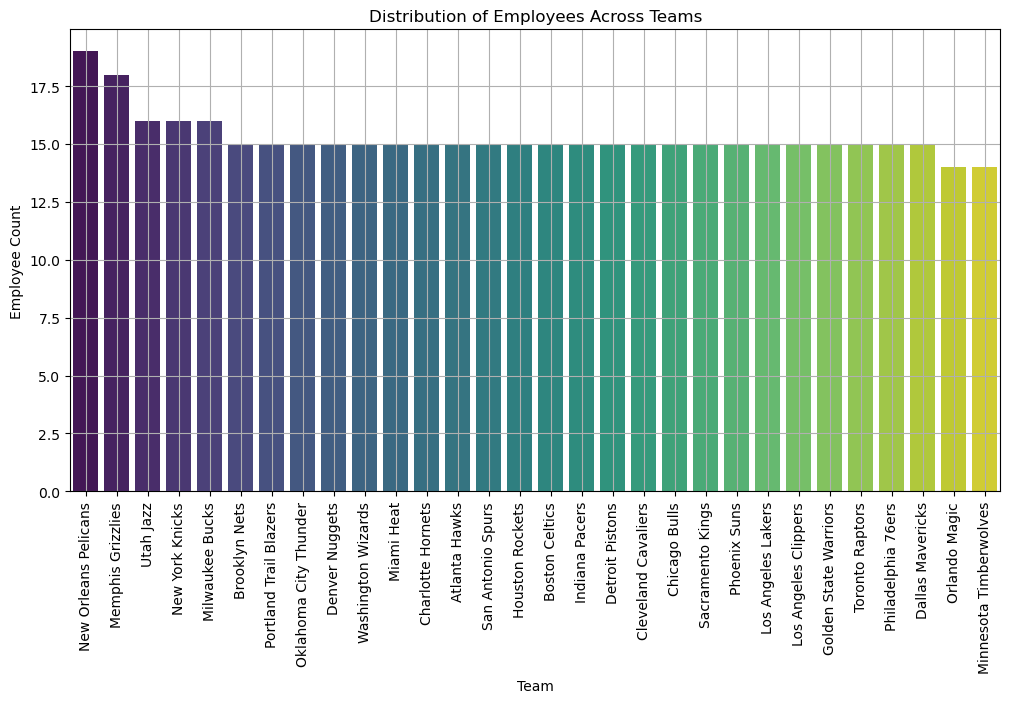

In [4]:
## Task 1.Employee Distribution Across Teams
team_distribution = data["Team"].value_counts()
team_percentage = (team_distribution / len(data)) * 100
team_analysis = pd.DataFrame({"Employee Count": team_distribution, "Percentage (%)": team_percentage}).reset_index().rename(columns={"index": "Team"})
print(team_analysis)

plt.figure(figsize=(12, 6))
sns.barplot(x=team_analysis["Team"], y=team_analysis["Employee Count"],palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Team")
plt.ylabel("Employee Count")
plt.title("Distribution of Employees Across Teams")
plt.grid(True)
plt.show()

  Position  Employee Count
0       SG             102
1       PF             100
2       PG              92
3       SF              85
4        C              79


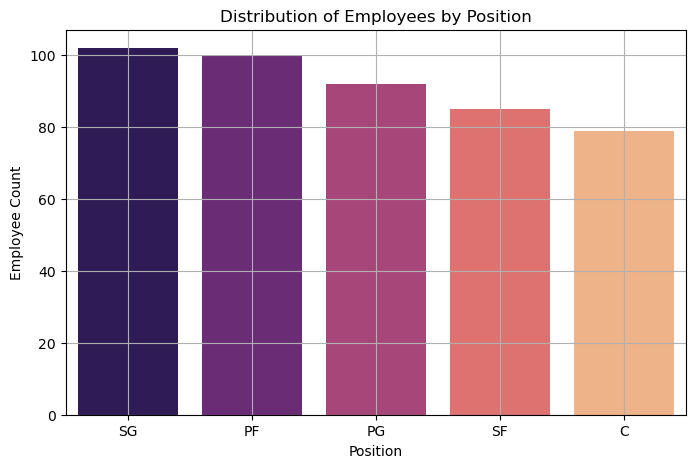

In [5]:
## Task 2.Employee Distribution by Position
position_distribution = data["Position"].value_counts()
position_analysis = pd.DataFrame({"Employee Count": position_distribution}).reset_index().rename(columns={"index": "Position"})
print(position_analysis)

plt.figure(figsize=(8, 5))
sns.barplot(x=position_analysis["Position"], y=position_analysis["Employee Count"],palette="magma")
plt.xlabel("Position")
plt.ylabel("Employee Count")
plt.title("Distribution of Employees by Position")
plt.grid(True)
plt.show()

  Age Group  Employee Count
0     18-25             200
1     26-30             167
2     31-35              68
3     36-40              23
4     41-50               0


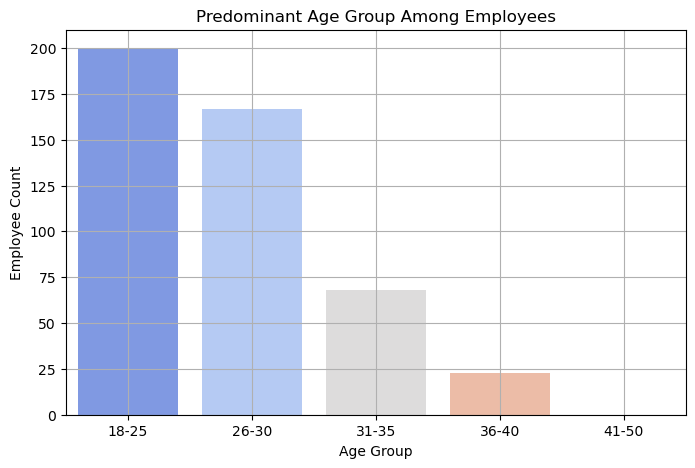

In [6]:
## Task 3.Predominant Age Group
bins = [18, 25, 30, 35, 40, 50]
labels = ["18-25", "26-30", "31-35", "36-40", "41-50"]
data["Age Group"] = pd.cut(data["Age"], bins=bins, labels=labels, right=True)
age_group_distribution = data["Age Group"].value_counts().sort_index()
age_group_analysis = pd.DataFrame({ "Employee Count": age_group_distribution}).reset_index().rename(columns={"index": "Age Group"})
print(age_group_analysis)

plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_analysis["Age Group"], y=age_group_analysis["Employee Count"], palette="coolwarm")
plt.xlabel("Age Group")
plt.ylabel("Employee Count")
plt.title("Predominant Age Group Among Employees")
plt.grid(True)
plt.show()

Team
Cleveland Cavaliers       109824875.0
Los Angeles Clippers       94854640.0
Oklahoma City Thunder      93765298.0
Golden State Warriors      88868997.0
Miami Heat                 88188045.0
Memphis Grizzlies          87895624.0
Chicago Bulls              86783378.0
San Antonio Spurs          84442733.0
New Orleans Pelicans       82750774.0
Charlotte Hornets          78340920.0
Washington Wizards         76328636.0
Houston Rockets            75283021.0
New York Knicks            73303898.0
Atlanta Hawks              72902950.0
Los Angeles Lakers         71770431.0
Sacramento Kings           71683666.0
Dallas Mavericks           71198732.0
Toronto Raptors            71117611.0
Milwaukee Bucks            69603517.0
Detroit Pistons            67168263.0
Indiana Pacers             66751826.0
Utah Jazz                  64007367.0
Phoenix Suns               63445135.0
Denver Nuggets             62958116.0
Minnesota Timberwolves     62545883.0
Boston Celtics             61377254.0
Orlando

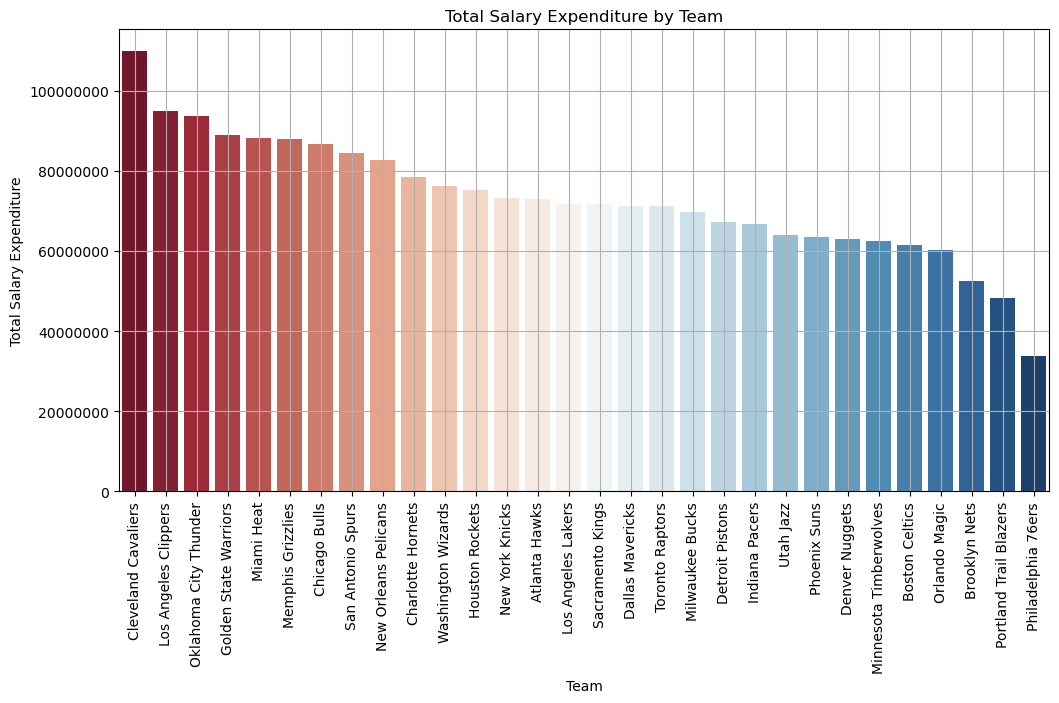

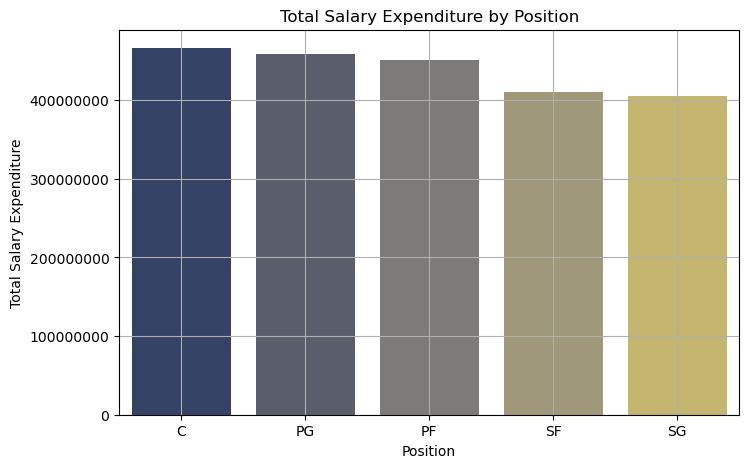

In [7]:
## Task 4.Highest Salary Expenditure by Team & Position
team_salary_expenditure = data.groupby("Team")["Salary"].sum().sort_values(ascending=False)
position_salary_expenditure = data.groupby("Position")["Salary"].sum().sort_values(ascending=False)
print(team_salary_expenditure)
print(position_salary_expenditure)

#Salary by Team
plt.figure(figsize=(12, 6))
sns.barplot(x=team_salary_expenditure.index, y=team_salary_expenditure.values, palette="RdBu")
plt.xticks(rotation=90)
plt.xlabel("Team")
plt.ylabel("Total Salary Expenditure")
plt.title("Total Salary Expenditure by Team")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#Salary by Position
plt.figure(figsize=(8, 5))
sns.barplot(x=position_salary_expenditure.index, y=position_salary_expenditure.values, palette="cividis")
plt.xlabel("Position")
plt.ylabel("Total Salary Expenditure")
plt.title("Total Salary Expenditure by Position")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

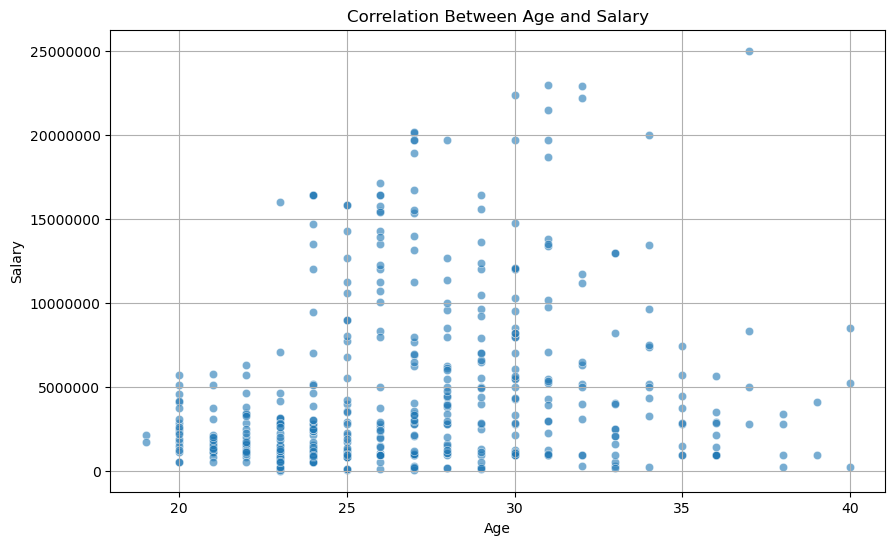

Processed dataset saved as: processed_employee_data.csv


In [8]:
## Task 5.Correlation Between Age and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["Age"], y=data["Salary"], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Correlation Between Age and Salary")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

output_file = "processed_employee_data.csv"
data.to_csv(output_file, index=False)
print(f"Processed dataset saved as: {output_file}")